In [1]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels

# تغيير المسارات حسب بياناتك
folder_path_class_0 = r"C:\UsersDesktop\Dataset\"
folder_path_class_1 = r"C:\Users\Desktop\Dataset\"
folder_path_class_2 = r"C:\Users\Desktop\Dataset\"

images_class_0, labels_class_0 = load_images_from_folder(folder_path_class_0, 0)
images_class_1, labels_class_1 = load_images_from_folder(folder_path_class_1, 1)
images_class_2, labels_class_2 = load_images_from_folder(folder_path_class_2, 2)

images = images_class_0 + images_class_1 + images_class_2
labels = labels_class_0 + labels_class_1 + labels_class_2

# تحويل الصور إلى مصفوفة numpy وتطبيعها
X = np.array([cv2.resize(img, (64, 64)) for img in images]) / 255.0
y = np.array(labels)

print("Data loaded and processed.")


Data loaded and processed.


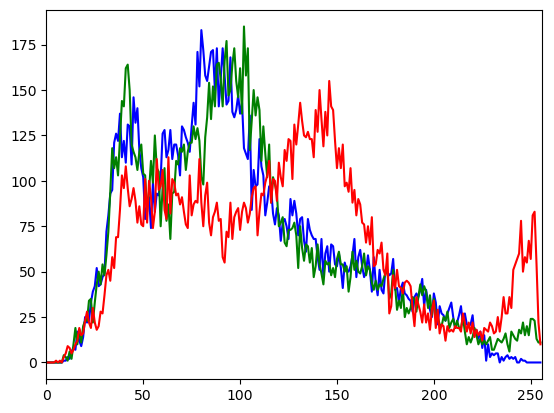

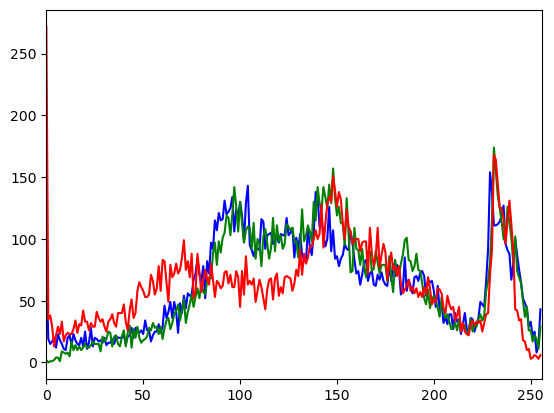

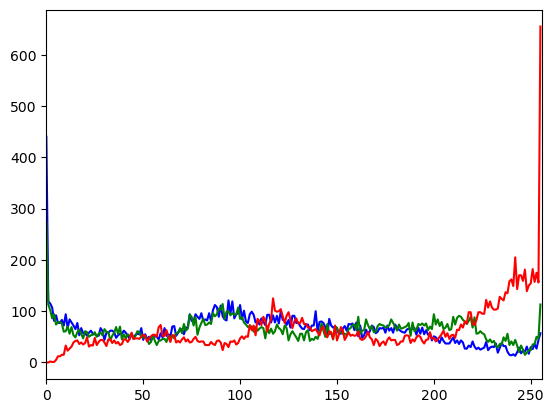

In [2]:
import matplotlib.pyplot as plt

def plot_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.show()

# عرض هيستوجرام لصورة واحدة من كل فئة كمثال
plot_histogram(images_class_0[0])
plot_histogram(images_class_1[0])
plot_histogram(images_class_2[0])


C:\Users\ramez kamal\.anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 37s 131ms/step - accuracy: 0.7395 - loss: 0.5945 - val_accuracy: 0.9532 - val_loss: 0.1619
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 37s 114ms/step - accuracy: 0.9429 - loss: 0.1578 - val_accuracy: 0.9593 - val_loss: 0.1404
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.9725 - loss: 0.0875 - val_accuracy: 0.9615 - val_loss: 0.1069
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - accuracy: 0.9845 - loss: 0.0536 - val_accuracy: 0.9699 - val_loss: 0.0889
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 111ms/step - accuracy: 0.9923 - loss: 0.0310 - val_accuracy: 0.9710 - val_loss: 0.0925
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 27s 120ms/step - accuracy: 0.9918 - loss: 0.0327 - val_accuracy: 0.9760 - val_loss: 0.0696
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 27s 119ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.9744 - val_loss: 0.0758
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 123ms/step - accuracy: 0.9968 - loss: 0

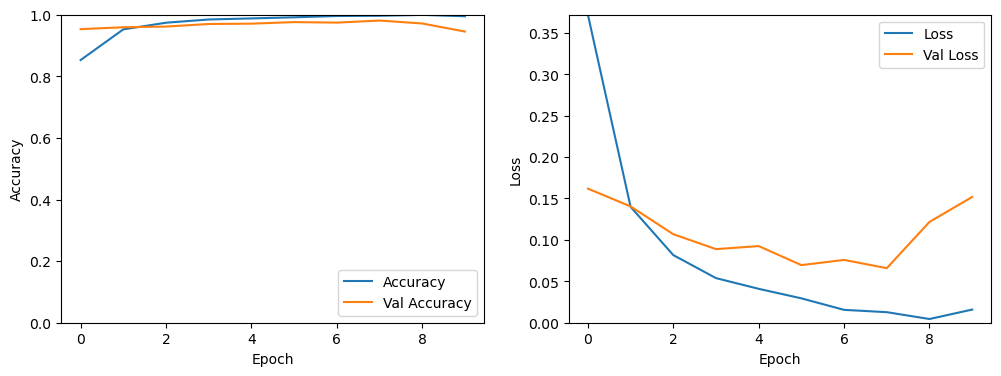

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تحويل التسميات إلى تنسيق one-hot
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

# بناء النموذج
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # التصنيف الثلاثي
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# تقييم النموذج
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# حفظ النموذج
model_save_path =r"C:\Users\\Desktop\Dataset\New folder\n.h5"
model.save(model_save_path)

# رسم الدقة وفقدان التدريب
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(history.history['loss'])])
plt.legend(loc='upper right')

plt.show()


In [4]:
import cv2
import tensorflow as tf
import numpy as np

# تحميل النموذج المدرب
model_path = r"C:\Users\Desktop\black_hacker\adly\Dataset\New folder\nnnn.h5"
model = tf.keras.models.load_model(model_path)

def preprocess_image(img):
    img = cv2.resize(img, (64, 64))  # تغيير حجم الصورة بما يتوافق مع المدخلات المطلوبة للنموذج
    img = img / 255.0  # تطبيع الصورة
    img = np.expand_dims(img, axis=0)  # إضافة بعد لتتناسب مع مدخلات النموذج (1, 64, 64, 3)
    return img

# فتح الكاميرا
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # معالجة الإطار من الكاميرا
    processed_frame = preprocess_image(frame)
    
    # استخدام النموذج للتنبؤ
    prediction = model.predict(processed_frame)
    class_idx = np.argmax(prediction, axis=1)[0]
    label = "class_0" if class_idx == 0 else "class_1" if class_idx == 1 else "class_2"

    # عرض النتيجة على الإطار
    color = (0, 255, 0) if class_idx == 0 else (255, 0, 0) if class_idx == 1 else (0, 0, 255)
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2.imshow('Real-time Classification', frame)

    # إيقاف العرض عند الضغط على مفتاح 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# تحرير الكاميرا وإغلاق جميع النوافذ
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━